In [1]:
import os
import numpy as np
import asdf
import json

from glob import glob


# JWST pipeline-related modules
from jwst.datamodels import dqflags

# The entire jwst pipeline
from jwst.pipeline import calwebb_detector1
from jwst.pipeline import calwebb_image2
from jwst.pipeline import calwebb_image3
from jwst import datamodels

# importing an individual pipeline step
from jwst.skymatch import SkyMatchStep

# Custom scripts for use later

import matplotlib.pyplot as plt
from matplotlib import rcParams

# Use this version for non-interactive plots (easier scrolling of the notebook)
#%matplotlib inline

# Use this version if you want interactive plots
#%matplotlib notebook

from astropy.io import fits

%matplotlib inline

# These gymnastics are needed to make the sizes of the figures
# be the same in both the inline and notebook versions
#%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

# You may want to change the following configurations to customize 
# figure sizes and resolutions
rcParams['figure.figsize'] = [11,8]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 80

from jwst.associations.asn_from_list import asn_from_list
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base


In [2]:
os.environ['CRDS_PATH'] = '/Volumes/T7-RED/crds_cache/' 
os.environ['CRDS_SERVER_URL'] = 'https://jwst-crds.stsci.edu'


In [3]:
import jwst
print(jwst.__version__)

1.7.2


In [4]:
try:
    print(os.environ['CRDS_PATH'])
except KeyError:
    print('CRDS_PATH environment variable not set!')
    
try:
    print(os.environ['CRDS_SERVER_URL'])
except KeyError:
    print('CRDS_SERVER_URL environment variable not set!')

try:
    print(os.environ['CRDS_CONTEXT'])
except KeyError:
    print('CRDS_CONTEXT environment variable not set!')

/Volumes/T7-RED/crds_cache/
https://jwst-crds.stsci.edu
CRDS_CONTEXT environment variable not set!


In [5]:
file_id = 'F090W'

proposalID = '2736'

output_dir = file_id+'-calibrated'

print(output_dir)

os.system('mkdir -p {}'.format(output_dir))

F090W-calibrated


0

# Stage1


In [8]:
#download the .py files from https://github.com/chriswillott/jwst
import checkifstar
from dosnowballflags import snowballflags


In [9]:
uncal_file = glob('JWST/*/*uncal.fits')
uncal_file

['JWST/jw02736001001_02101_00001_nrca1/jw02736001001_02101_00001_nrca1_uncal.fits',
 'JWST/jw02736001001_02101_00001_nrca2/jw02736001001_02101_00001_nrca2_uncal.fits',
 'JWST/jw02736001001_02101_00001_nrca3/jw02736001001_02101_00001_nrca3_uncal.fits',
 'JWST/jw02736001001_02101_00001_nrca4/jw02736001001_02101_00001_nrca4_uncal.fits',
 'JWST/jw02736001001_02101_00001_nrcb1/jw02736001001_02101_00001_nrcb1_uncal.fits',
 'JWST/jw02736001001_02101_00001_nrcb2/jw02736001001_02101_00001_nrcb2_uncal.fits',
 'JWST/jw02736001001_02101_00001_nrcb3/jw02736001001_02101_00001_nrcb3_uncal.fits',
 'JWST/jw02736001001_02101_00001_nrcb4/jw02736001001_02101_00001_nrcb4_uncal.fits',
 'JWST/jw02736001001_02101_00002_nrca1/jw02736001001_02101_00002_nrca1_uncal.fits',
 'JWST/jw02736001001_02101_00002_nrca2/jw02736001001_02101_00002_nrca2_uncal.fits',
 'JWST/jw02736001001_02101_00002_nrca3/jw02736001001_02101_00002_nrca3_uncal.fits',
 'JWST/jw02736001001_02101_00002_nrca4/jw02736001001_02101_00002_nrca4_uncal

In [10]:
uncal_file = glob('JWST/*/*uncal.fits')
uncal_file

for uncal in uncal_file:

# save the jump.fits

    detector1 = calwebb_detector1.Detector1Pipeline()
    detector1.output_dir = '/'.join(uncal.split('/')[0:-1])
    detector1.save_results = True

    detector1.ipc.skip = True

    detector1.jump.save_results = True

    detector1.ramp_fit.skip = True
    detector1.gain_scale.skip = True
    
    run_output = detector1.run(uncal)

# snowball flag to the jump.fits

    jumpdirfile = uncal.replace('uncal','jump')
    imagingmode = True
    filtername = fits.getheader(uncal)['FILTER']
    npixfind = 50
    satpixradius=3
    halofactorradius=2

    snowballflags(jumpdirfile,filtername,npixfind,satpixradius,halofactorradius,imagingmode)

# run the last two step of the pipeline from jump.fits, and save the rate.fits
    detector1 = calwebb_detector1.Detector1Pipeline()
    detector1.output_dir = output_dir
    detector1.save_results = True

    detector1.group_scale.skip = True
    detector1.dq_init.skip = True
    detector1.saturation.skip = True
    detector1.ipc.skip = Tru
    detector1.superbias.skip = True
    detector1.refpix.skip = True
    detector1.rscd.skip = True
    detector1.firstframe.skip = True
    detector1.lastframe.skip = True
    detector1.linearity.skip = True
    detector1.dark_current.skip = True
    detector1.reset.skip = True
    detector1.persistence.skip = True
    detector1.jump.skip = True

    detector1.ramp_fit.skip = False
    detector1.gain_scale.skip = False

    run_output = detector1.run(jumpdirfile)

#    break




2022-09-29 13:12:03,240 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 13:12:03,242 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 13:12:03,243 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 13:12:03,245 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 13:12:03,246 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 13:12:03,247 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 13:12:03,250 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 13:12:03,251 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 13:12:03,253 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 13:12:03,255 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 13:14:01,799 - stpipe - WARNING - /usr/local/lib/python3.9/site-packages/astropy/io/fits/card.py:1008: VerifyWarning: Card is too long, comment will be truncated.
  warnings.warn('Card is too long, comment will be truncated.',

2022-09-29 13:14:03,885 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 13:14:03,887 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 13:14:03,891 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 13:14:03,892 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scal

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 13:17:25,600 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 13:17:25,602 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 13:17:25,603 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 13:17:25,605 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 13:17:25,607 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 13:17:25,609 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 13:17:25,611 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 13:17:25,612 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 13:17:25,614 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 13:17:25,616 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 13:21:35,019 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 13:21:35,022 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 13:21:35,024 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 13:21:35,025 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 13:21:35,027 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  if spikes_mean/notspikes_mean

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 13:24:51,469 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 13:24:51,471 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 13:24:51,472 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 13:24:51,474 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 13:24:51,475 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 13:24:51,477 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 13:24:51,478 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 13:24:51,480 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 13:24:51,481 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 13:24:51,483 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 13:27:31,425 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 13:27:31,426 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 13:27:31,427 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 13:27:32,682 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 13:27:32,684 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 13:27:32,685 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 13:27:32,687 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instanc

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 13:30:18,671 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 13:30:18,673 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 13:30:18,675 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 13:30:18,676 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 13:30:18,678 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 13:30:18,679 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 13:30:18,681 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 13:30:18,682 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 13:30:18,684 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 13:30:18,686 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 13:33:43,100 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 13:33:43,102 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 13:33:43,104 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 13:33:46,963 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 13:33:46,964 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 13:33:46,966 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 13:33:46,967 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instan

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 13:37:10,358 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 13:37:10,360 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 13:37:10,361 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 13:37:10,363 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 13:37:12,864 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 13:37:12,865 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep inst

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 13:40:08,083 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 13:40:08,085 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 13:40:08,086 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 13:40:08,088 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 13:40:08,089 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 13:40:08,091 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 13:40:08,092 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 13:40:08,094 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 13:40:08,095 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 13:40:08,097 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 13:42:43,774 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 13:42:43,776 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 13:42:44,150 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 13:42:44,151 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 13:42:44,152 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean 

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 13:45:36,753 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 13:45:36,755 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 13:45:36,756 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 13:45:36,758 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 13:45:36,760 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 13:45:36,761 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 13:45:36,763 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 13:45:36,764 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 13:45:36,765 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 13:45:36,767 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 13:48:19,709 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 13:48:19,711 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 13:48:19,712 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 13:48:19,714 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 13:48:19,715 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 13:48:19,717 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 13:48:19,719 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 13:48:19,721 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 13:48:19,724 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 13:48:19,726 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 13:51:20,876 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 13:51:20,878 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 13:51:20,879 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 13:51:20,881 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 13:51:20,883 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 13:51:20,884 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 13:51:20,886 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 13:51:20,888 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 13:51:20,889 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 13:51:20,891 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 13:54:25,596 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 13:54:25,598 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 13:54:25,599 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 13:54:25,601 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 13:54:25,603 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 13:54:25,604 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 13:54:25,606 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 13:54:25,608 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 13:54:25,609 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 13:54:25,612 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 13:57:21,125 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 13:57:21,127 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 13:57:21,128 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 13:57:21,130 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 13:57:21,132 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 13:57:21,133 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 13:57:21,135 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 13:57:21,136 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 13:57:21,137 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 13:57:21,139 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 14:00:15,424 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 14:00:15,425 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 14:00:15,427 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 14:00:15,428 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 14:00:15,430 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 14:00:15,432 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 14:00:15,434 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 14:00:15,436 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 14:00:15,437 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 14:00:15,440 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 14:03:18,607 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 14:03:18,609 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 14:03:18,610 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 14:03:18,612 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 14:03:18,613 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 14:03:18,615 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 14:03:18,616 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 14:03:18,618 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 14:03:18,619 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 14:03:18,620 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 14:06:20,722 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 14:06:20,724 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 14:06:20,726 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 14:06:20,728 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 14:06:20,729 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 14:06:20,731 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 14:06:20,732 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 14:06:20,733 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 14:06:20,735 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 14:06:20,737 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 14:09:14,695 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:09:14,697 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:09:14,699 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:09:14,702 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:09:14,704 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  if spikes_mean/notspikes_mean

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 14:12:11,496 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 14:12:11,497 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 14:12:11,498 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 14:12:11,500 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 14:12:11,502 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 14:12:11,503 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 14:12:11,505 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 14:12:11,507 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 14:12:11,508 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 14:12:11,510 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 14:15:00,751 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 14:15:00,753 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 14:15:00,754 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 14:15:00,757 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 14:15:00,759 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 14:15:00,760 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 14:15:00,763 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 14:15:00,764 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 14:15:00,766 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 14:15:00,769 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 14:17:54,649 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:17:54,651 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:17:54,652 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:17:54,655 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:17:54,656 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean 

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 14:20:52,708 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 14:20:52,709 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 14:20:52,710 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 14:20:52,712 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 14:20:52,714 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 14:20:52,715 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 14:20:52,717 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 14:20:52,718 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 14:20:52,720 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 14:20:52,721 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 14:23:52,704 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:23:52,705 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:23:52,707 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:23:52,708 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:23:52,709 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  if spikes_mean/notspikes_mean

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 14:27:19,887 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 14:27:19,889 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 14:27:19,890 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 14:27:19,891 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 14:27:19,893 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 14:27:19,895 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 14:27:19,896 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 14:27:19,898 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 14:27:19,899 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 14:27:19,901 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 14:30:13,251 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 14:30:13,252 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 14:30:13,257 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 14:30:13,260 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 14:30:13,262 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 14:30:13,264 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 14:30:13,265 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 14:30:13,268 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 14:30:13,271 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 14:30:13,273 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 14:33:10,234 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:33:12,346 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:33:12,347 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:33:12,349 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:33:13,442 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean 

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 14:36:11,185 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 14:36:11,186 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 14:36:11,188 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 14:36:11,190 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 14:36:11,192 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 14:36:11,193 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 14:36:11,195 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 14:36:11,196 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 14:36:11,198 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 14:36:11,200 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 14:39:02,189 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:39:02,190 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:39:02,192 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:39:02,193 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:39:02,194 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean 

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 14:42:03,458 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 14:42:03,459 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 14:42:03,461 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 14:42:03,462 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 14:42:03,464 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 14:42:03,465 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 14:42:03,467 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 14:42:03,468 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 14:42:03,470 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 14:42:03,472 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 14:44:46,400 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:44:46,402 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:44:48,528 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 14:44:48,529 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 14:44:48,531 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 14:44:48,533 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 14:44:48,534 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 14:44:48,535 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 14:47:26,672 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 14:47:26,673 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 14:47:26,675 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 14:47:26,676 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 14:47:26,678 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 14:47:26,679 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 14:47:26,681 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 14:47:26,683 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 14:47:26,684 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 14:47:26,686 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 14:50:06,767 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:50:06,768 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:50:06,770 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:50:06,771 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 14:50:06,772 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean 

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 14:52:46,872 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 14:52:46,874 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 14:52:46,875 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 14:52:46,877 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 14:52:46,879 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 14:52:46,880 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 14:52:46,881 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 14:52:46,883 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 14:52:46,884 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 14:52:46,886 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 14:55:29,496 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 14:55:29,497 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 14:55:29,499 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 14:55:29,501 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 14:55:29,502 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 14:55:29,503 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 14:55:29,505 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 14:55:29,507 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 14:55:29,508 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 14:55:29,510 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 14:58:21,872 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 14:58:21,874 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 14:58:21,875 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 14:58:21,876 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 14:58:21,878 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 14:58:21,879 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 14:58:21,881 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 14:58:21,883 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 14:58:21,884 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 14:58:21,886 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 15:01:03,780 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:01:03,781 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:01:03,783 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:01:03,784 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:01:03,787 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean 

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 15:04:13,247 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 15:04:13,248 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 15:04:13,249 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 15:04:13,251 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 15:04:13,252 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 15:04:13,254 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 15:04:13,255 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 15:04:13,257 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 15:04:13,259 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 15:04:13,261 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 15:07:13,221 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 15:07:13,223 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 15:07:13,226 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 15:07:13,230 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 15:07:13,233 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 15:07:13,236 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 15:07:13,240 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 15:07:13,244 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 15:07:13,249 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 15:07:13,253 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 15:10:29,498 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 15:10:29,500 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 15:10:29,501 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 15:10:29,503 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 15:10:29,504 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 15:10:29,506 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 15:10:29,507 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 15:10:29,509 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 15:10:29,510 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 15:10:29,512 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 15:13:12,678 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:13:12,680 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:13:12,681 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:13:12,683 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:13:12,684 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean 

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 15:15:58,181 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 15:15:58,182 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 15:15:58,184 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 15:15:58,186 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 15:15:58,187 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 15:15:58,189 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 15:15:58,190 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 15:15:58,192 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 15:15:58,193 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 15:15:58,195 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 15:19:17,212 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 15:19:17,214 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 15:19:17,216 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 15:19:17,217 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 15:19:17,220 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 15:19:17,221 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 15:19:17,223 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 15:19:17,225 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 15:19:17,227 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 15:19:17,229 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 15:22:48,694 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:22:48,696 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:22:48,697 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:22:48,699 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:22:49,870 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 15:22:49,872 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep ins

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 15:26:01,692 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 15:26:01,693 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 15:26:01,694 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 15:26:01,697 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 15:26:01,698 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 15:26:01,699 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 15:26:01,701 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 15:26:01,702 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 15:26:01,704 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 15:26:01,706 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 15:29:07,323 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:29:07,325 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:29:07,327 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:29:07,329 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:29:08,373 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 15:29:08,374 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep insta

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 15:32:02,685 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 15:32:02,686 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 15:32:02,687 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 15:32:02,689 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 15:32:02,690 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 15:32:02,692 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 15:32:02,693 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 15:32:02,695 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 15:32:02,696 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 15:32:02,698 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 15:35:09,365 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 15:35:09,367 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 15:35:09,369 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 15:35:09,371 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 15:35:09,372 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 15:35:09,374 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 15:35:09,376 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 15:35:09,378 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 15:35:09,379 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 15:35:09,381 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 15:38:19,603 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 15:38:19,605 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 15:38:19,608 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 15:38:19,610 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 15:38:19,611 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 15:38:19,613 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 15:38:19,615 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 15:38:19,616 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 15:38:19,618 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 15:38:19,619 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 15:41:01,842 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 15:41:01,843 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 15:41:01,845 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 15:41:01,846 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 15:41:01,848 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 15:41:01,849 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 15:41:01,851 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 15:41:01,852 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 15:41:01,854 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 15:41:01,856 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 15:43:31,045 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 15:43:31,047 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 15:43:31,048 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 15:43:31,050 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 15:43:31,051 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 15:43:31,053 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 15:43:31,054 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 15:43:31,056 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 15:43:31,057 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 15:43:31,059 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 15:45:59,794 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 15:45:59,796 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 15:45:59,797 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 15:45:59,799 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 15:45:59,801 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 15:45:59,802 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 15:45:59,803 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 15:45:59,805 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 15:45:59,806 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 15:45:59,808 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 15:48:39,087 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:48:39,089 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:48:39,090 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:48:43,447 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 15:48:43,449 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 15:48:43,450 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 15:48:43,452 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instanc

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 15:51:13,837 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 15:51:13,838 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 15:51:13,840 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 15:51:13,842 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 15:51:13,844 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 15:51:13,845 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 15:51:13,848 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 15:51:13,851 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 15:51:13,854 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 15:51:13,859 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 15:53:47,391 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 15:53:47,392 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 15:53:47,394 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 15:53:47,396 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 15:53:47,397 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 15:53:47,398 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 15:53:47,400 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 15:53:47,402 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 15:53:47,404 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 15:53:47,406 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 15:56:16,916 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 15:56:16,918 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 15:56:16,919 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 15:56:16,921 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 15:56:16,922 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 15:56:16,924 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 15:56:16,925 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 15:56:16,926 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 15:56:16,928 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 15:56:16,930 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 15:58:57,339 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:58:57,340 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:58:57,343 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:58:57,344 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 15:58:57,346 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean 

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 16:01:26,314 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 16:01:26,315 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 16:01:26,317 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 16:01:26,320 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 16:01:26,725 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean 

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 16:04:08,011 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 16:04:08,012 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 16:04:08,014 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 16:04:08,016 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 16:04:08,018 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 16:04:08,020 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 16:04:08,022 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 16:04:08,023 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 16:04:08,025 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 16:04:08,027 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 16:06:34,346 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 16:06:34,347 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 16:06:34,348 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 16:06:34,350 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 16:06:34,351 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean 

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 16:09:17,164 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 16:09:17,165 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 16:09:17,167 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 16:09:17,169 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 16:09:17,170 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 16:09:17,172 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 16:09:17,174 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 16:09:17,176 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 16:09:17,177 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 16:09:17,179 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 16:11:57,867 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 16:11:57,869 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 16:11:57,870 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 16:11:57,872 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 16:11:57,874 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 16:11:57,876 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 16:11:57,877 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 16:11:57,879 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 16:11:57,881 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 16:11:57,882 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 16:14:22,404 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 16:14:22,405 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 16:14:22,407 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 16:14:22,408 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 16:14:22,410 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 16:14:22,411 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 16:14:22,413 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 16:14:22,414 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 16:14:22,416 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 16:14:22,417 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 16:16:58,900 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 16:16:58,901 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 16:16:58,903 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 16:16:58,904 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 16:16:58,906 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 16:16:58,907 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 16:16:58,909 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 16:16:58,910 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 16:16:58,912 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 16:16:58,913 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 16:19:39,567 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 16:19:39,568 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 16:19:39,569 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 16:19:39,571 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 16:19:39,574 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 16:19:39,576 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 16:19:39,578 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 16:19:39,580 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 16:19:39,582 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 16:19:39,584 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 16:22:23,659 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 16:22:23,661 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 16:22:23,663 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 16:22:23,664 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 16:22:23,666 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 16:22:23,667 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 16:22:23,669 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 16:22:23,670 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 16:22:23,672 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 16:22:23,674 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 16:25:04,558 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 16:25:04,560 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 16:25:04,562 - stpipe - WARNING - /Volumes/T7-RED/SMACS0723/F090W/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 16:25:08,711 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 16:25:08,713 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 16:25:08,714 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 16:25:08,716 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instanc

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 16:27:43,362 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 16:27:43,364 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 16:27:43,365 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 16:27:43,367 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 16:27:43,368 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 16:27:43,370 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 16:27:43,371 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 16:27:43,373 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 16:27:43,374 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 16:27:43,376 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 16:30:03,687 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 16:30:03,689 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 16:30:03,690 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 16:30:03,691 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 16:30:03,693 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 16:30:03,694 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 16:30:03,696 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 16:30:03,697 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 16:30:03,699 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 16:30:03,701 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 16:32:25,081 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 16:32:25,082 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 16:32:25,083 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 16:32:25,085 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 16:32:25,086 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 16:32:25,088 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 16:32:25,089 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 16:32:25,091 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 16:32:25,092 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 16:32:25,094 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 16:34:44,643 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 16:34:44,645 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 16:34:44,646 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 16:34:44,648 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 16:34:44,649 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 16:34:44,650 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 16:34:44,652 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 16:34:44,654 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 16:34:44,655 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 16:34:44,657 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 16:37:36,828 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 16:37:36,830 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 16:37:36,831 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 16:37:36,833 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 16:37:36,834 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 16:37:36,836 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 16:37:36,837 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 16:37:36,839 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 16:37:36,841 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 16:37:36,843 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

# Stage2


In [11]:
rates_file = glob(file_id+'-calibrated/*rate.fits')
rates_file

['F090W-calibrated/jw02736001001_02101_00001_nrca1_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrca2_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrca3_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrca4_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrcb1_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrcb2_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrcb3_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrcb4_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrca1_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrca2_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrca3_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrca4_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrcb1_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrcb2_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrcb3_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrcb4_rate

In [12]:
rates_file = glob(file_id+'-calibrated/*rate.fits')

for rate in rates_file:
    # Create an instance of the pipeline class
    image2 = calwebb_image2.Image2Pipeline()

    # Set some parameters that pertain to the
    # entire pipeline
    image2.output_dir = output_dir
    image2.save_results = True
    # turn off the ResampleStep, comment out to produce the 
    # individual rectified *_i2d.fits for quick-look checks
    image2.resample.skip = True

    # Call the run() method
    image2.run(rate)

2022-09-29 16:42:41,685 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2022-09-29 16:42:41,688 - stpipe.Image2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2022-09-29 16:42:41,692 - stpipe.Image2Pipeline.assign_wcs - INFO - AssignWcsStep instance created.
2022-09-29 16:42:41,695 - stpipe.Image2Pipeline.flat_field - INFO - FlatFieldStep instance created.
2022-09-29 16:42:41,696 - stpipe.Image2Pipeline.photom - INFO - PhotomStep instance created.
2022-09-29 16:42:41,699 - stpipe.Image2Pipeline.resample - INFO - ResampleStep instance created.
2022-09-29 16:42:42,027 - stpipe.Image2Pipeline - INFO - Step Image2Pipeline running with args ('F090W-calibrated/jw02736001001_02101_00001_nrca1_rate.fits',).
2022-09-29 16:42:42,033 - stpipe.Image2Pipeline - INFO - Step Image2Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': 'F090W-calibrated', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

In [14]:
from plotimages import plot_images
from image1overf import sub1fimaging
from astropy.io import fits

In [15]:
calfiles = glob(output_dir+'/jw*_cal.fits')
calfiles

['F090W-calibrated/jw02736001001_02101_00001_nrca1_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrca2_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrca3_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrca4_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrcb1_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrcb2_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrcb3_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrcb4_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrca1_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrca2_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrca3_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrca4_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrcb1_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrcb2_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrcb3_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrcb4_cal.fits',
 'F090W-

In [16]:
output_dir

'F090W-calibrated'

In [17]:
for cal2file in calfiles:
    cal21overffile = cal2file.replace('_cal.fits','_cal_1overf.fits')
    print ('Running 1/f correction on {} to produce {}'.format(cal2file,cal21overffile))
    with fits.open(cal2file) as cal2hdulist:
        if cal2hdulist['PRIMARY'].header['SUBARRAY']=='FULL' or cal2hdulist['PRIMARY'].header['SUBARRAY']=='SUB256':
            sigma_bgmask=3.0
            sigma_1fmask=2.0
            splitamps=False   #Set to True only in a sparse field so each amplifier will be fit separately. 
            correcteddata = sub1fimaging(cal2hdulist,sigma_bgmask,sigma_1fmask,splitamps)
            if cal2hdulist['PRIMARY'].header['SUBARRAY']=='FULL':
                cal2hdulist['SCI'].data[4:2044,4:2044] = correcteddata  
            elif cal2hdulist['PRIMARY'].header['SUBARRAY']=='SUB256':
                cal2hdulist['SCI'].data[:252,:252] = correcteddata
            cal2hdulist.writeto(cal21overffile, overwrite=True)

Running 1/f correction on F090W-calibrated/jw02736001001_02101_00001_nrca1_cal.fits to produce F090W-calibrated/jw02736001001_02101_00001_nrca1_cal_1overf.fits
Running 1/f correction on F090W-calibrated/jw02736001001_02101_00001_nrca2_cal.fits to produce F090W-calibrated/jw02736001001_02101_00001_nrca2_cal_1overf.fits
Running 1/f correction on F090W-calibrated/jw02736001001_02101_00001_nrca3_cal.fits to produce F090W-calibrated/jw02736001001_02101_00001_nrca3_cal_1overf.fits
Running 1/f correction on F090W-calibrated/jw02736001001_02101_00001_nrca4_cal.fits to produce F090W-calibrated/jw02736001001_02101_00001_nrca4_cal_1overf.fits
Running 1/f correction on F090W-calibrated/jw02736001001_02101_00001_nrcb1_cal.fits to produce F090W-calibrated/jw02736001001_02101_00001_nrcb1_cal_1overf.fits
Running 1/f correction on F090W-calibrated/jw02736001001_02101_00001_nrcb2_cal.fits to produce F090W-calibrated/jw02736001001_02101_00001_nrcb2_cal_1overf.fits
Running 1/f correction on F090W-calibrat

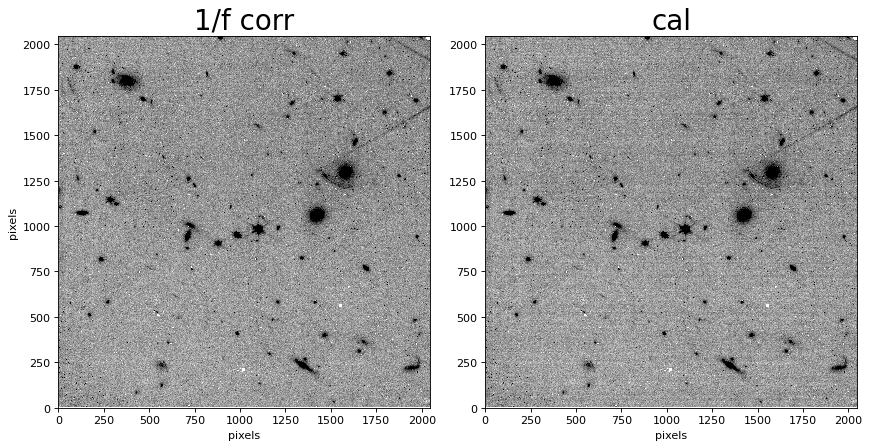

In [18]:
plot_images(cal21overffile,
            cal2file, 
            title1='1/f corr', title2='cal')

In [5]:
'JWST-'+file_id

'JWST-F090W'

# Stage 3

In [6]:
calfiles = glob(output_dir+'/jw*_cal_1overf.fits')
asn = asn_from_list(calfiles,rule=DMS_Level3_Base, product_name='test')
asn

{
    "asn_type": "None",
    "asn_rule": "DMS_Level3_Base",
    "version_id": null,
    "code_version": "1.7.0",
    "degraded_status": "No known degraded exposures in association.",
    "program": "noprogram",
    "constraints": "No constraints",
    "asn_id": "a3001",
    "target": "none",
    "asn_pool": "none",
    "products": [
        {
            "name": "test",
            "members": [
                {
                    "expname": "F090W-calibrated/jw02736001001_02101_00001_nrca1_cal_1overf.fits",
                    "exptype": "science"
                },
                {
                    "expname": "F090W-calibrated/jw02736001001_02101_00001_nrca2_cal_1overf.fits",
                    "exptype": "science"
                },
                {
                    "expname": "F090W-calibrated/jw02736001001_02101_00001_nrca3_cal_1overf.fits",
                    "exptype": "science"
                },
                {
                    "expname": "F090W-calibrated/jw0

In [7]:
json_stage3 = 'JWST-'+file_id+'-stage3.json'
with open(json_stage3, 'w') as outfile:
    name,serialized = asn.dump(format='json') 
    outfile.write(serialized)

In [9]:
image3 = calwebb_image3.Image3Pipeline()

# Set some parameters that pertain to the entire pipeline
image3.output_dir = file_id+'-calibrated/'
image3.output_file = file_id+'_i2d.fits'

image3.save_results = True
# Set some parameters that pertain to some of the individual steps

image3.tweakreg.skip = False 
#image3.tweakreg.backend == 'sextractor'
image3.tweakreg.align_to_gaia == True
# Turn off SkyMatchStep

image3.skymatch.subtract = True
image3.skymatch.skip = False
# Set the ratio of input to output pixels to create an output mosaic 
# on a 0.015"/pixel scale

image3.resample.pixel_scale = 0.03
# Call the run() method

image3.run(json_stage3)


2022-09-14 12:38:31,596 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2022-09-14 12:38:31,600 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2022-09-14 12:38:31,607 - stpipe.Image3Pipeline.tweakreg - INFO - TweakRegStep instance created.
2022-09-14 12:38:31,611 - stpipe.Image3Pipeline.skymatch - INFO - SkyMatchStep instance created.
2022-09-14 12:38:31,615 - stpipe.Image3Pipeline.outlier_detection - INFO - OutlierDetectionStep instance created.
2022-09-14 12:38:31,621 - stpipe.Image3Pipeline.resample - INFO - ResampleStep instance created.
2022-09-14 12:38:31,626 - stpipe.Image3Pipeline.source_catalog - INFO - SourceCatalogStep instance created.
2022-09-14 12:38:31,801 - stpipe.Image3Pipeline - INFO - Step Image3Pipeline running with args ('JWST-F090W-stage3.json',).
2022-09-14 12:38:31,837 - stpipe.Image3Pipeline - INFO - Step Image3Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': '/Volumes/T7-RED/SMACS072